3-2 regression interpretation Anne Cloutier GitHub: Vetiver5

# 1. Regressive Tennis T-Test

Use a linear regression and statsmodels to run a t-test on whether Federer scores more points than his opponents in the `tennis.csv` dataset.

Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value. 

Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

rng = np.random.RandomState(1)

#load file
tennis = pd.read_csv("/content/drive/MyDrive/m3-2-regression-interpretation/data/tennis.csv")

In [4]:
#prep DF = remove NaN values from ten2
tennis = tennis.dropna()
np.count_nonzero(tennis.isnull().values) 

0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player2 total points won   R-squared (uncentered):                   0.969
Model:                                  OLS   Adj. R-squared (uncentered):              0.969
Method:                       Least Squares   F-statistic:                          3.173e+04
Date:                      Sun, 23 May 2021   Prob (F-statistic):                        0.00
Time:                              00:28:57   Log-Likelihood:                         -4126.1
No. Observations:                      1016   AIC:                                      8254.
Df Residuals:                          1015   BIC:                                      8259.
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
player1 total points won     0.8608      0.005    178.124      0.000       0.851       0.870
==============================================================================
Omnibus:                       69.375   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.649
Skew:                           0.697   Prob(JB):                     1.13e-18
Kurtosis:                       3.099   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

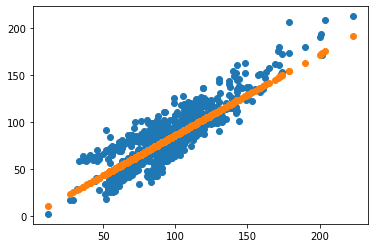

In [5]:
#model 1 = without constant added
x = tennis['player1 total points won']
y = tennis['player2 total points won']

est = sm.OLS(y,x).fit()
yfit = est.predict(x)

plt.scatter(x, y)
plt.scatter(x, yfit)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player2 total points won   R-squared (uncentered):                   0.969
Model:                                  OLS   Adj. R-squared (uncentered):              0.969
Method:                       Least Squares   F-statistic:                          3.173e+04
Date:                      Sun, 23 May 2021   Prob (F-statistic):                        0.00
Time:                              00:28:57   Log-Likelihood:                         -4126.1
No. Observations:                      1016   AIC:                                      8254.
Df Residuals:                          1015   BIC:                                      8259.
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
player1 total points won     0.8608      0.005    178.124      0.000       0.851       0.870
==============================================================================
Omnibus:                       69.375   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.649
Skew:                           0.697   Prob(JB):                     1.13e-18
Kurtosis:                       3.099   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

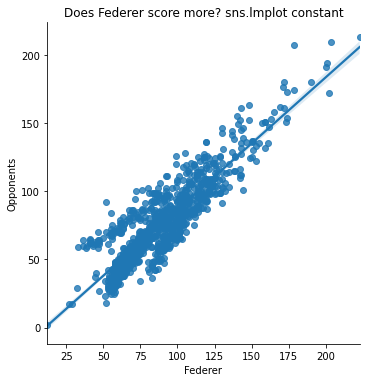

In [6]:
#model with a constant inserted by sns.lmplot

#generate plot
sns.lmplot(x ='player1 total points won',
            y = 'player2 total points won', data=tennis)
plt.title('Does Federer score more? sns.lmplot constant')
# Set x-axis label
plt.xlabel('Federer')
# Set y-axis label
plt.ylabel('Opponents')

#generate OLS summary
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player2 total points won   R-squared:                       0.794
Model:                                  OLS   Adj. R-squared:                  0.794
Method:                       Least Squares   F-statistic:                     3903.
Date:                      Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                              00:28:58   Log-Likelihood:                -4100.3
No. Observations:                      1016   AIC:                             8205.
Df Residuals:                          1014   BIC:                             8215.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -10.2706      1.413     -7.267      0.000     -13.044      -7.497
player1 total points won     0.9681      0.015     62.477      0.000       0.938       0.998
==============================================================================
Omnibus:                       80.698   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.295
Skew:                           0.739   Prob(JB):                     4.52e-22
Kurtosis:                       3.367   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

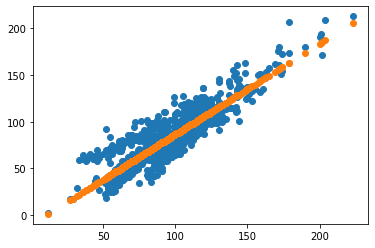

In [7]:
#model 2 = with sm constant added

x = tennis['player1 total points won']
y = tennis['player2 total points won']
x = sm.add_constant(x)
est = sm.OLS(y,x).fit()
y_fed = est.predict(x)

plt.scatter(x.iloc[:,1], y)
plt.scatter(x['player1 total points won'], y_fed)
est.summary()

In [8]:
model = sm.OLS(y,x)
results = model.fit()
results.params

const                      -10.270605
player1 total points won     0.968058
dtype: float64

In [9]:
#A. Explain the meaning of the coefficient and of the P-value
#the P-value is smaller than 0.05 after the addition of a constant, which means that the null hypothesis can be rejected. In this case:
#would mean that Federer does score more points than his opponents.
#In the first run (without a constant), the P-value is 0 but variance between 

#After adding a constant, the coefficient goes down from 26 with a +=1 standard error value to a 1.12 coeff with a .007 standard error value - a healthier relationship between x and y.

# 2. College admissions

Using the `college.csv` dataset, answer the following:

1. Is the relation between `Top10perc` and `Top25perc` best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best of these model specifications?

2. Do private schools see more admissions overall? T-test this using a linear regression. Hint: use a binary explanatory variable for `Private`. Explain your model specification choices.


In [10]:
college = pd.read_csv("/content/drive/MyDrive/m3-2-regression-interpretation/data/college.csv")
college.head(5)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [11]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Top25perc   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              7971.
Date:                Sun, 23 May 2021   Prob (F-statistic):                        0.00
Time:                        00:28:58   Log-Likelihood:                         -3332.4
No. Observations:                 777   AIC:                                      6667.
Df Residuals:                     776   BIC:                                      6671.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Top10perc      1.7275      0.019     89.281      0.000       1.690       1.766
==============================================================================
Omnibus:                      290.739   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1310.349
Skew:                          -1.681   Prob(JB):                    2.89e-285
Kurtosis:                       8.401   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

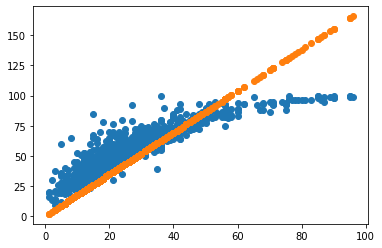

In [12]:
"""Is the relation between Top10perc and Top25perc best fit using a model with only one variable
, or one variable and a polynomial of degree 2?"""

#one variable
x = college['Top10perc']
y = college['Top25perc']

est = sm.OLS(y, x).fit()
fit = est.predict(x)

plt.scatter(x, y)
plt.scatter(x,fit)
est.summary()

Anne comment : graph fit line change looks like adding a constant will also help, which I do next with a polynomial addition

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Top25perc   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     2220.
Date:                Sun, 23 May 2021   Prob (F-statistic):          2.50e-321
Time:                        00:28:58   Log-Likelihood:                -2681.0
No. Observations:                 777   AIC:                             5368.
Df Residuals:                     774   BIC:                             5382.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           16.6786      0.845     19.738      0.000      15.020      18.337
Top10perc        1.8140      0.050     36.229      0.000       1.716       1.912
Top10perc_sq    -0.0102      0.001    -17.072      0.000      -0.011      -0.009
==============================================================================
Omnibus:                      177.730   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.823
Skew:                           1.089   Prob(JB):                    1.12e-124
Kurtosis:                       6.590   Cond. No.                     5.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

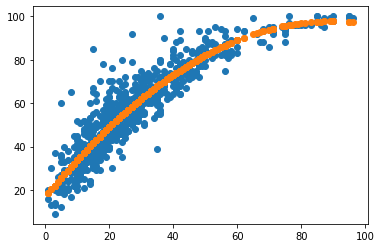

In [13]:
#add a polynomial = in this case, top25% squared

#one variable
#one variable
x = college['Top10perc']
y = college['Top25perc']

X = sm.add_constant(x)
X['Top10perc_sq'] = X['Top10perc'] ** 2

est = sm.OLS(y, X).fit()
yfit = est.predict(X)

plt.scatter(X['Top10perc'], y)
plt.scatter(X['Top10perc'], yfit)
est.summary()

In [14]:
#R-squared level goes up by .6 with the addition of the polynomial
#and the constant
#as well, the BIC goes down by 1300
#For both these reasons, as well as the improvement of the trendline fit,
#both the addition of the constant and the polynomial improve the model

In [15]:
results.ssr

190480.4927910444

In [16]:
#Since the BIC has decreased, the polynomial model2 is better
#Adj R-squared changes from 	0.795 to 0.856
#coeff increases to 16 from 1 and standard error rate needle moves almost to 1 from a .0019 value
#before

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Enroll   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     368.9
Date:                Sun, 23 May 2021   Prob (F-statistic):           1.49e-67
Time:                        00:28:58   Log-Likelihood:                -6261.0
No. Observations:                 777   AIC:                         1.253e+04
Df Residuals:                     775   BIC:                         1.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.8726     52.560     31.219      0.000    1537.695    1744.050
private    -1183.9275     61.637    -19.208      0.000   -1304.924   -1062.931
==============================================================================
Omnibus:                      421.162   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3666.463
Skew:                           2.310   Prob(JB):                         0.00
Kurtosis:                      12.587   Cond. No.                         3.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

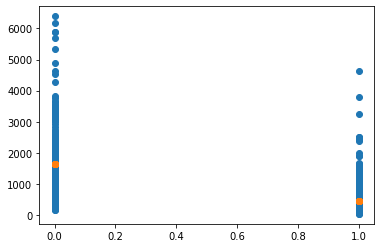

In [17]:
"""Question 2 : Do private schools see more admissions overall?"""
import numpy as np
import pandas as pd
import statsmodels.api as sm

x = pd.get_dummies(college.Private, drop_first=True)
X = sm.add_constant(x)
X.columns = ['const','private']
y = college.Enroll
est = sm.OLS(y, X).fit()
yfit = est.predict(X)

yfit = est.predict(X)

plt.scatter(X['private'], y)
plt.scatter(X['private'],yfit)

est.summary()

In [18]:
#As the diagram above and below show, public schools (0 = not private) have considerably more enrollments than private ones.
#No polynomial was required, but I added a constant automatically. The AIC and BIC are both very low (1.25)

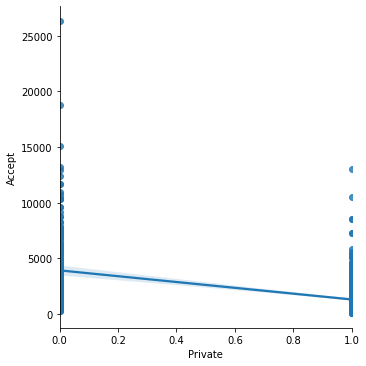

In [19]:
#here's the magic : )
college['Private'] = college.Private.replace('Yes', 1).replace('No', 0)
sns.lmplot(x='Private', y='Accept', data=college, order=1)

In [20]:
#t-test results
#Based on the OLS summary t-test results, Private schools enroll 38% of the number of students
#than non-private ones do, in line with the diff between the const and private coefficients.

# 3. Auto prediction

Using the `auto.csv` dataset, perform a simple linear regression with `mpg` as the response variable and horsepower as the predictor. Answer the following:

 i. Is there a relationship between the predictor and the response?
 
 ii. How strong is the relationship between the predictor and the response?
 
 iii. Is the relationship between the predictor and the response positive or negative?

 iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

 v. Make a regression plot the response and the predictor.

In [21]:
#load data and straighten out delimiter problems in the column name row and subsequent one
#clean out ?s and replace with NaN, drop NaNs

import pandas as pd
import numpy

names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']

df_auto = pd.read_csv("//content/drive/MyDrive/m3-2-regression-interpretation/data/auto.csv", skiprows = [0,1], delim_whitespace = True, names = names)

df_auto.horsepower = df_auto.horsepower.replace('?', np.nan).astype('float')
df_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [22]:
#drop na values
df2_auto = df_auto[['mpg','horsepower']].dropna()
np.count_nonzero(df2_auto.isnull().values)

0

In [23]:
#Q1: perform a simple linear regression with mpg 
#as the response variable and horsepower as the predictor.

#add polynomial to x value (horsepower)to create 2 horsepower values
df2_auto['horsepower_sq'] = df2_auto['horsepower'] ** 2

y = df2_auto.mpg
x = sm.add_constant(df2_auto.drop(columns=['mpg']))


est = sm.OLS(y, x).fit(cov_type='HC2')
est.summary()

#OLS summary shows, when looking at the coeff levels and their confidence intervals
#that the higher the horsepower, the lower the number of mpg.

#Q2 = the relationship is clear (strong) in the OLS summary

#Q3 the relationship is negative (>horsepower = <mpg)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     601.3
Date:                Sun, 23 May 2021   Prob (F-statistic):          9.66e-120
Time:                        00:28:59   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:                  HC2                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            56.9001      2.090     27.222      0.000      52.803      60.997
horsepower       -0.4662      0.033    -14.029      0.000      -0.531      -0.401
horsepower_sq     0.0012      0.000     10.294      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:

est.predict([1, 98, 98**2])

array([23.03158468])

In [25]:
#What is the predicted mpg associated with a horsepower of 98? 

#define a constant which is an average consumption (mpg)
df2_auto.mpg.mean()

23.44591836734694

In [26]:
#generate a prediction = 23.03 miles per gallon
est.predict([23.51586, 98, 98**2])

array([1304.18626356])

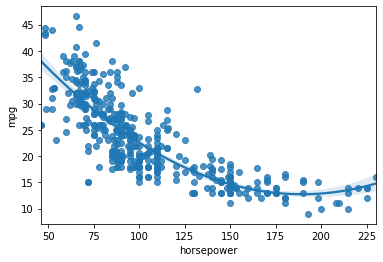

In [27]:
#plot the regression and fit it
sns.regplot(x='horsepower', y = 'mpg', data=df2_auto, order =  2)

In [28]:
#residplot shows that there are less residuals around higher horsepower vehicles

# 4. Auto Multiple Regression

Perform a multiple linear regression with `mpg` as the response and all other variables except name in `auto` as the predictors. Comment on the output:

i. Is there a relationship between the predictors and the response?

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?

v. Is there heteroscedasticity in the fit?

In [29]:
df_auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [30]:
#generate copy for this exercise
df3 = df_auto
df3.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [31]:
df3.info

<bound method DataFrame.info of       mpg  cylinders  displacement  ...  year  origin                       name
0    18.0          8         307.0  ...    70       1  chevrolet chevelle malibu
1    15.0          8         350.0  ...    70       1          buick skylark 320
2    18.0          8         318.0  ...    70       1         plymouth satellite
3    16.0          8         304.0  ...    70       1              amc rebel sst
4    17.0          8         302.0  ...    70       1                ford torino
..    ...        ...           ...  ...   ...     ...                        ...
392  27.0          4         140.0  ...    82       1            ford mustang gl
393  44.0          4          97.0  ...    82       2                  vw pickup
394  32.0          4         135.0  ...    82       1              dodge rampage
395  28.0          4         120.0  ...    82       1                ford ranger
396  31.0          4         119.0  ...    82       1                 chevy s

In [35]:
#Create basic plot with MPG as the dependent (y) and all other elements except 'name
#in the dataset as predictors

#drop null values
df3.dropna()

#fit model
y = df3.mpg
x = df3.drop(columns=['mpg', 'name', 'horsepower', 'cylinders', 'displacement'])
X = sm.add_constant(x)

est = sm.OLS(y,X).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     418.8
Date:                Sun, 23 May 2021   Prob (F-statistic):          4.66e-140
Time:                        00:31:02   Log-Likelihood:                -1040.7
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     392   BIC:                             2111.
Df Model:                           4                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.0294      3.904     -4.874      0.000     -26.681     -11.377
weight          -0.0059      0.000    -24.114      0.000      -0.006      -0.005
acceleration     0.0794      0.085      0.932      0.351      -0.088       0.246
year             0.7508      0.046     16.171      0.000       0.660       0.842
origin           1.1677      0.277      4.219      0.000       0.625       1.710
==============================================================================
Omnibus:                       34.087   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.513
Skew:                           0.544   Prob(JB):                     1.97e-13
Kurtosis:                       4.534   Cond. No.                     7.40e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 7.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Q1 =is there a relationship between mpg (y) and x values?
#   we can say yes for many based on the R-squared results (.82) and the 0.0 p-values

# Q2 =  displacement, weight, year and origin. There is less of a relationship with MPG
#   for horsepower, acceleration and cylinders

#Q3 = meaning of "year" factor?
    #with each additional year, mpg performance increases by .75 gallon per mile

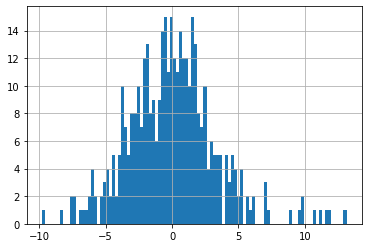

In [36]:
#plot residuals
#sns residual function does not suit for this (tried, too many variables)
#bit sns plotting with hist does

est.resid.hist(bins=100)

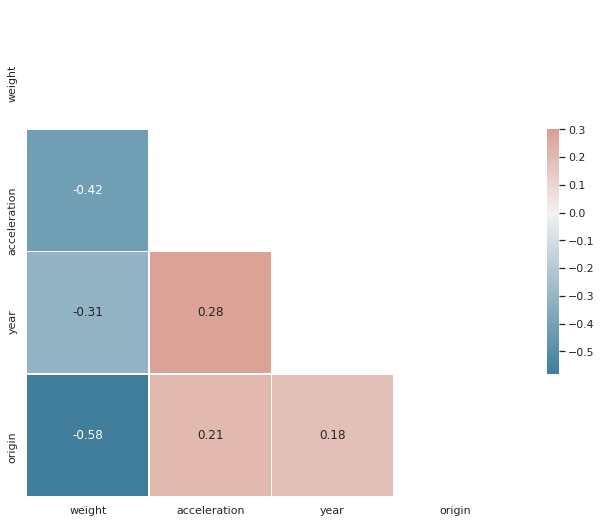

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
corr = x.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  annot =True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


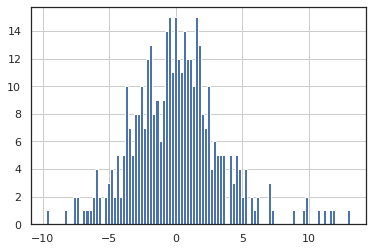

In [39]:
est.resid.hist(bins=100)

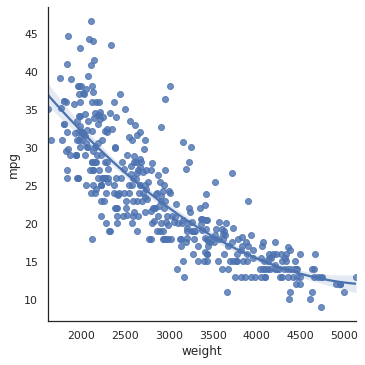

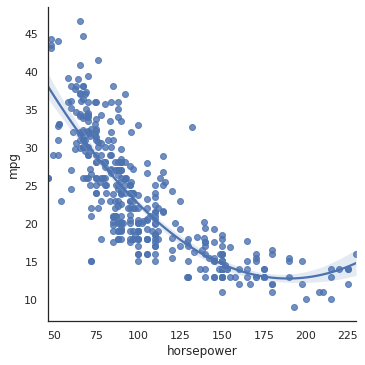

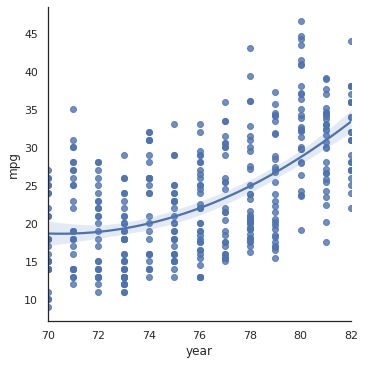

In [42]:
#is there heteroscedasticity?
#OLS summary says that errors show that there is, but here is a sns.lmplot
#between related elements

sns.lmplot(x='weight', y='mpg', data=df3, order=2)
sns.lmplot(x='horsepower', y='mpg', data=df3, order=2)
sns.lmplot(x='year', y='mpg', data=df3, order=2)

In [41]:
#there is heteroscesdacity between horsepower and mpg, as well as mpg and weight, 
#but a the correlation between year and mpg is doubtful.

# 5. Car Seats

This question should be answered using the Carseats data set

1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

2. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?

4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.

6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [43]:
# load packages
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

rng = np.random.RandomState(1)

In [44]:
#data category meaning
"""
Sales - Unit sales (in thousands) at each location
CompPrice - Price charged by competitor at each location
Income - Community income level (in thousands of dollars)
Advertising - Local advertising budget for company at each location (in thousands of dollars)
Population - Population size in region (in thousands)
Price - Price company charges for car seats at each site
ShelveLoc - A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
Age - Average age of the local population
Education - Education level at each location
Urban - A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US - A factor with levels No and Yes to indicate whether the store is in the US or not
"""

'\nSales - Unit sales (in thousands) at each location\nCompPrice - Price charged by competitor at each location\nIncome - Community income level (in thousands of dollars)\nAdvertising - Local advertising budget for company at each location (in thousands of dollars)\nPopulation - Population size in region (in thousands)\nPrice - Price company charges for car seats at each site\nShelveLoc - A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site\nAge - Average age of the local population\nEducation - Education level at each location\nUrban - A factor with levels No and Yes to indicate whether the store is in an urban or rural location\nUS - A factor with levels No and Yes to indicate whether the store is in the US or not\n'

In [45]:
#load carseats data

car=pd.read_csv("/content/drive/MyDrive/m3-2-regression-interpretation/data/carseats.csv")
car.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [46]:
car.info()
#there are no null values to drop.
#the 3 qualitative columns(ShelveLoc, Urban, US) are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [52]:
#Data pre-processing: Converting qualitative data (string columns) with One Hot Encoding
#Since there are 2 types of those (ShelveLoc has 3 qualitative, and US & Urban are boolean Y/N formats)
#i'm using a loop and sklearn's LabelEncoder package to convert all columns at once

#Fetch object-type columns
objFeatures = car.select_dtypes(include="object").columns

#Iterate a loop for features of type object
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for feat in objFeatures:
    car[feat] = le.fit_transform(car[feat].astype(str))

car.info()
car.head()
#ShelveLoc = 0=bad, 1 = good, 2=medium
#Urban = 1 = yes 0 = No
#US = 1 = yes 0 = no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


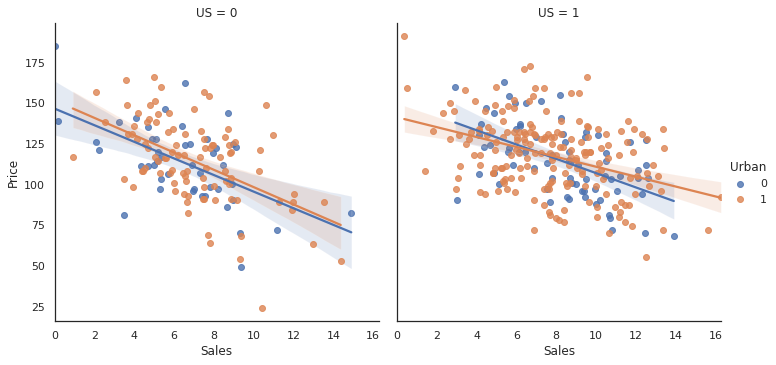

In [48]:
sns.lmplot(x="Sales", y="Price", hue="Urban", col="US", data=car);

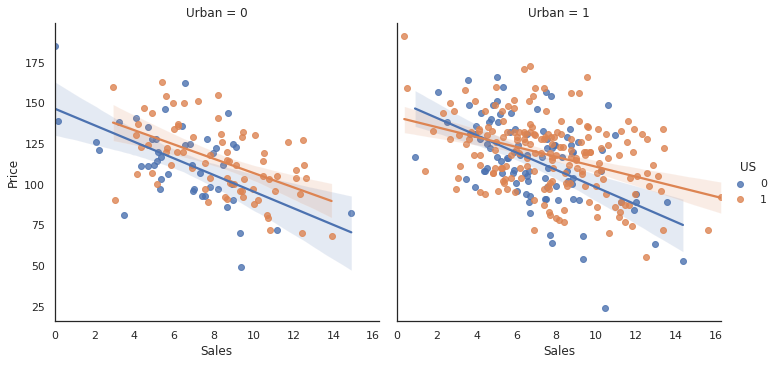

In [49]:
sns.lmplot(x="Sales", y="Price", hue="US", col="Urban", data=car);

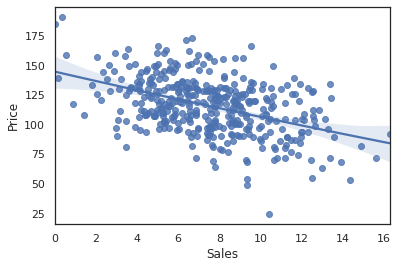

In [50]:
#plot the regression and fit it
sns.regplot(x='Sales', y = 'Price', data=car, order =  2)